100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [30:30<00:00,  5.46it/s]


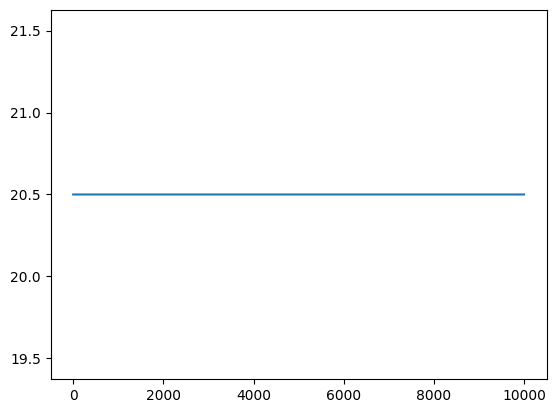

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(0)

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 1024
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            sigmoid_x = self.sigmoid(x)
            return sigmoid_x * (1 - sigmoid_x)
        else:
            pos_mask = (x >= 0)
            neg_mask = (x < 0)
            z = np.zeros_like(x)
            sigmoid_x = np.zeros_like(x)
            z[pos_mask] = np.exp(-x[pos_mask])
            z[neg_mask] = np.exp(x[neg_mask])
            sigmoid_x[pos_mask] = 1 / (1 + z[pos_mask])
            sigmoid_x[neg_mask] = z[neg_mask] / (1 + z[neg_mask])
            return sigmoid_x
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

NN = NeuralNetwork()

dataset_dir = "C:/Users/DMP LOG/Desktop/CVPR Assignment/CIFAR-10-images-master/"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

def convert_image_to_grayscale(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def preprocess_data(data_dir):
    X = []
    Y = []
    labels = os.listdir(data_dir)
    
    for label in tqdm(labels):
        label_dir = os.path.join(data_dir, label)
        images = os.listdir(label_dir)
        
        for image in images:
            image_path = os.path.join(label_dir, image)
            gray_image = convert_image_to_grayscale(image_path)
            flattened_image = gray_image.flatten() / 255.0
            X.append(flattened_image)
            Y.append(label)
    
    # Convert class names to numerical labels
    unique_labels = np.unique(Y)
    label_map = {label: i for i, label in enumerate(unique_labels)}
    Y = np.array([label_map[label] for label in Y])
    
    return np.array(X), np.array(Y).reshape(-1, 1)

X_train, Y_train = preprocess_data(train_dir)
X_test, Y_test = preprocess_data(test_dir)

err = []
for i in tqdm(range(10000)):
    NN.train(X_train, Y_train)
    err.append(np.mean(np.square(Y_train - NN.feedForward(X_train))))

plt.plot(err)
plt.show()
